In [1]:
import pandas as pd
import numpy as np

In [2]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
data=pd.read_csv('Churn_Modelling.csv')

In [4]:
data.shape

(10002, 14)

Customer ID: A unique identifier for each customer
Surname: The customer's surname or last name
Credit Score: A numerical value representing the customer's credit score
GeographyGeography: The country where the customer resides (France, Spain or Germany)
Gender: The customer's gender (Male or Female)
Age: The customer's age.
Tenure: The number of years the customer has been with the bank
Balance: The customer's account balance
NumOfProductsNumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
Age: The customer's age.

In [5]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.duplicated().sum()

2

In [8]:
new_data=data.dropna()

In [9]:
new_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
new_data.shape

(9998, 14)

In [11]:
new_data1=new_data.drop_duplicates()

In [12]:
new_data1.duplicated().sum()

0

In [15]:
new_data1.shape

(9996, 14)

In [13]:
new_data1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [14]:
new_data1.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [15]:
#drop columns that are not relevant to the model
new_dataset = new_data1.drop(['RowNumber', 'CustomerId','Surname'], axis=1)

In [16]:
new_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [17]:
new_dataset.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [18]:
new_dataset['Exited'].value_counts()

Exited
0    7959
1    2037
Name: count, dtype: int64

In [19]:
new_dataset['Balance'].describe()

count      9996.000000
mean      76476.263216
std       62397.118820
min           0.000000
25%           0.000000
50%       97173.290000
75%      127639.372500
max      250898.090000
Name: Balance, dtype: float64

# viewing highest amount column

In [20]:
#viewing highest amount column
new_dataset['Balance'].idxmax()

2092

In [21]:
#locate row 2092 with high balance
new_dataset.loc[2092]

CreditScore              655
Geography              Spain
Gender                  Male
Age                     38.0
Tenure                     3
Balance            250898.09
NumOfProducts              3
HasCrCard                0.0
IsActiveMember           1.0
EstimatedSalary      81054.0
Exited                     1
Name: 2092, dtype: object

In [22]:
#locate row 2092 with high balance
#new_dataset.iloc[:2092]

In [23]:
new_dataset[new_dataset['Balance'] == 250898.090000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2092,655,Spain,Male,38.0,3,250898.09,3,0.0,1.0,81054.0,1


In [24]:
new_dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [25]:
new_dataset.shape

(9996, 11)

In [26]:
new_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [27]:
#counts number of exited yes(1) and no(0)
new_dataset['Exited'].value_counts()

Exited
0    7959
1    2037
Name: count, dtype: int64

Unbalanced Dataset

In [28]:
#counts number of Gender
new_dataset['Gender'].value_counts()

Gender
Male      5454
Female    4542
Name: count, dtype: int64

In [29]:
#Counts customers who have Credit card and not having 1=yes,0=No
new_dataset['HasCrCard'].value_counts()

HasCrCard
1.0    7052
0.0    2944
Name: count, dtype: int64

In [30]:
##Counts customers who are active member 1=yes,0=No
new_dataset['IsActiveMember'].value_counts()

IsActiveMember
1.0    5147
0.0    4849
Name: count, dtype: int64

# visualize the dataset

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

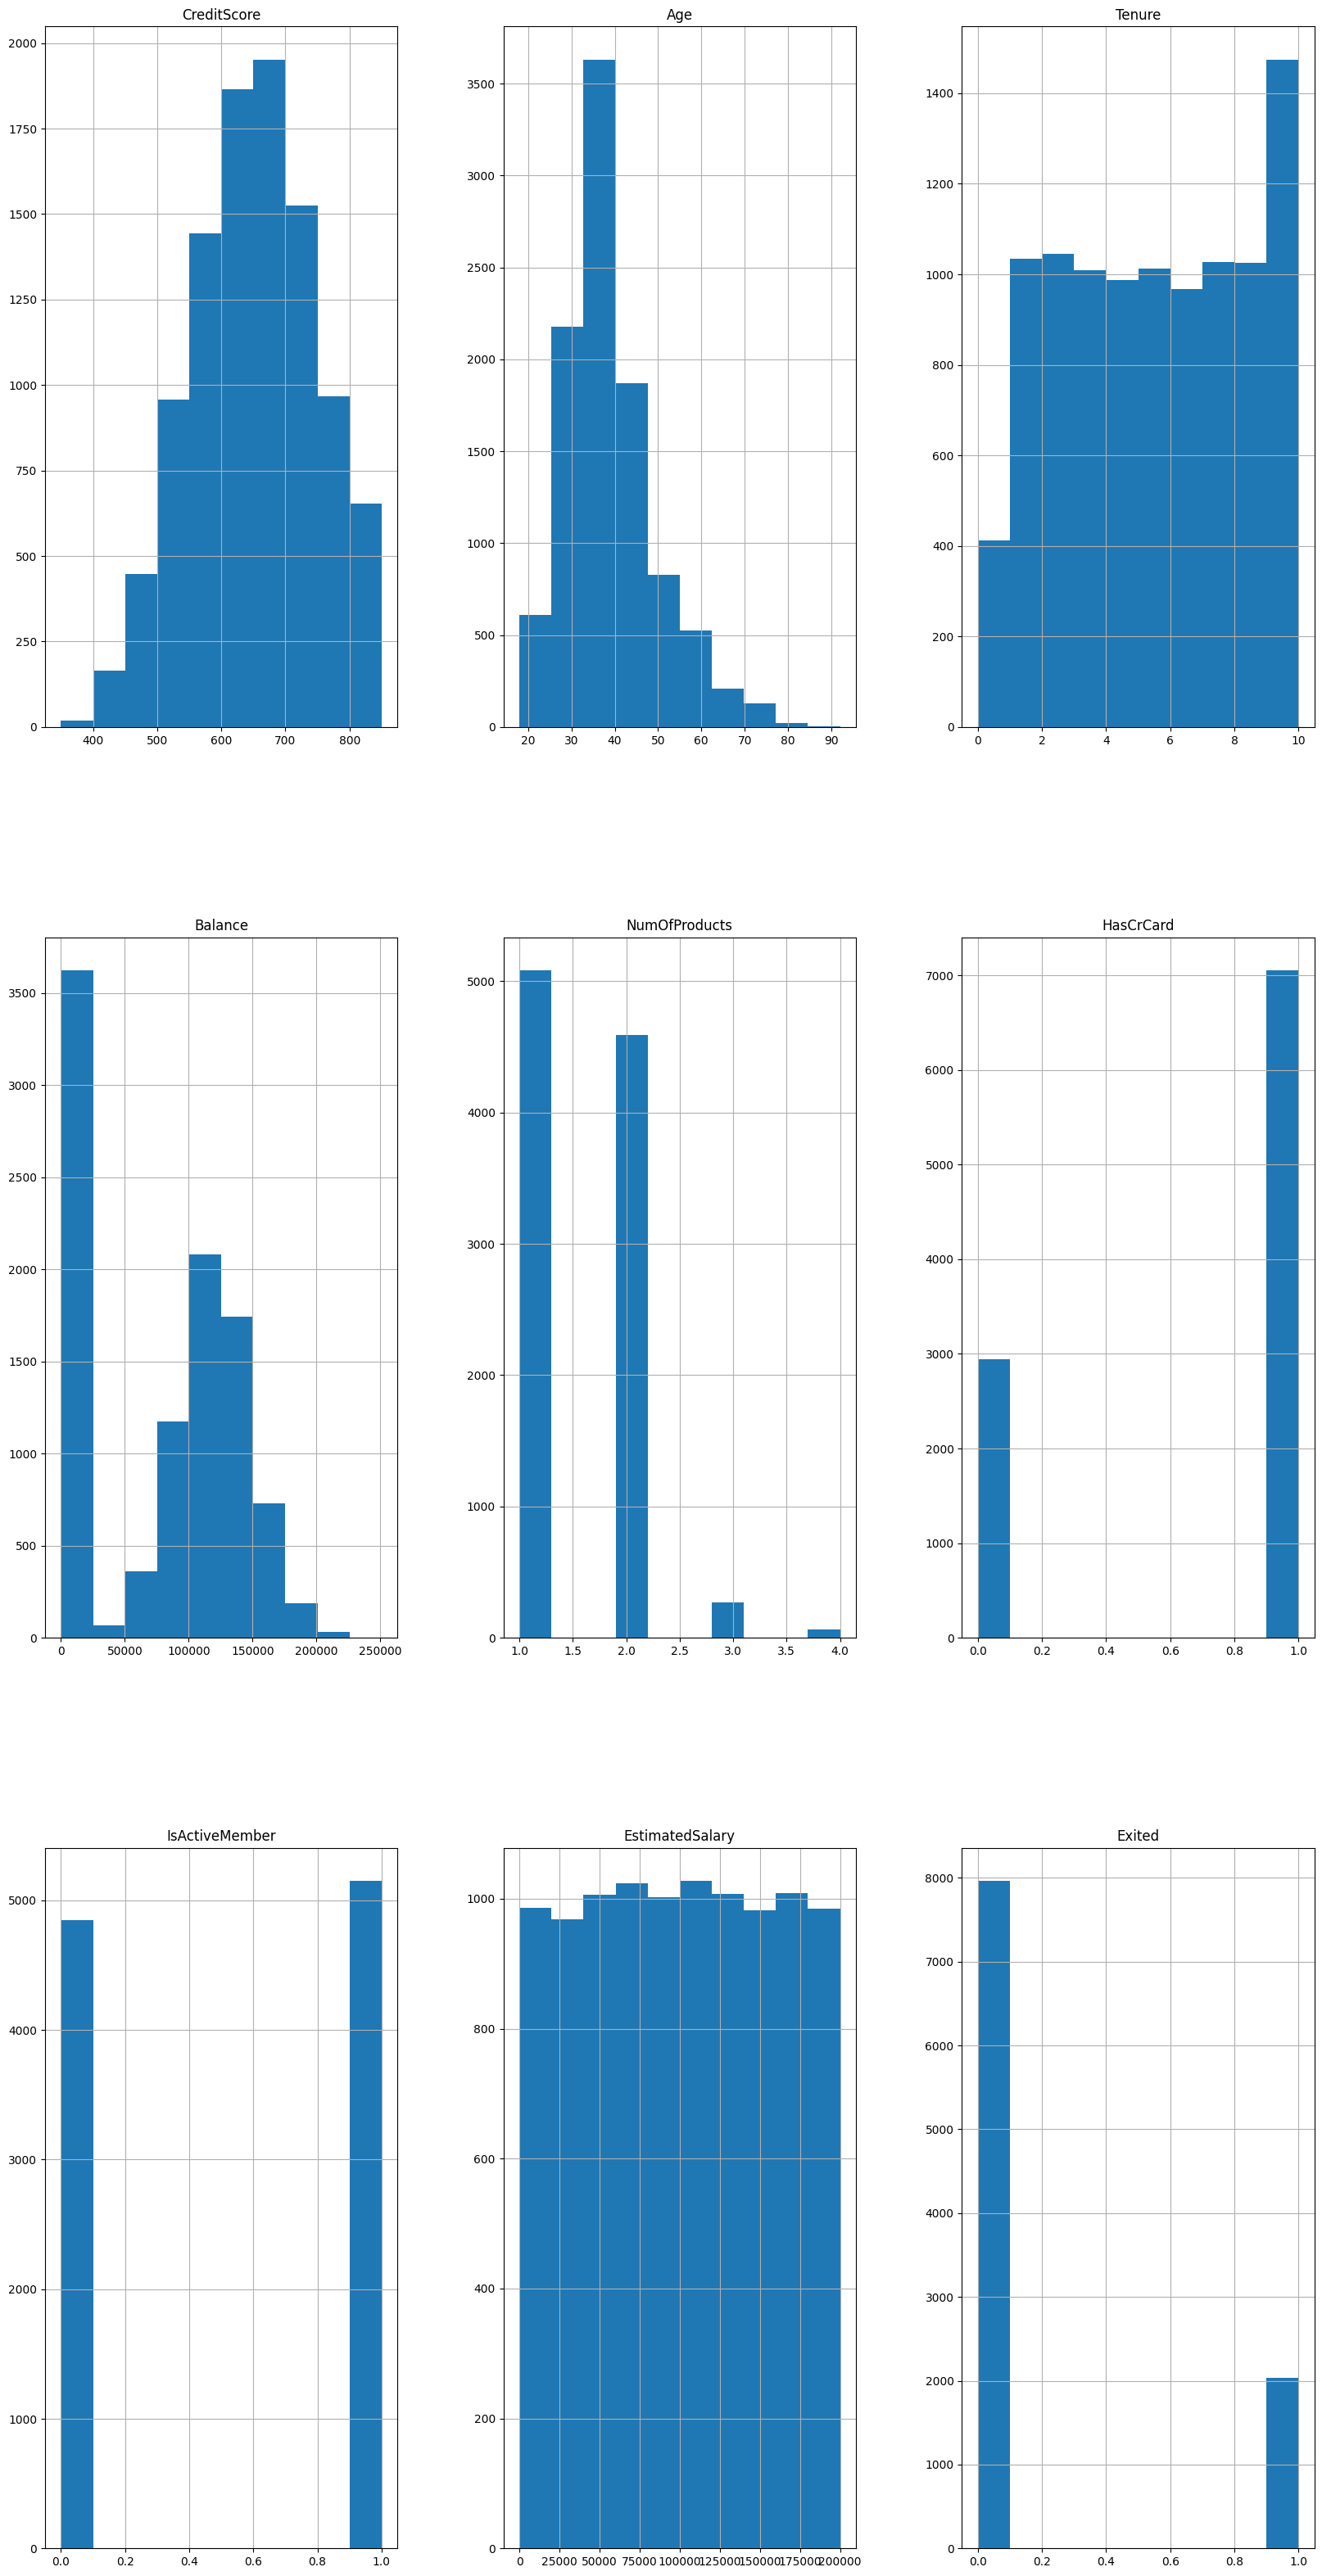

In [32]:
new_dataset.hist(bins=10,figsize=(20,40))

# Viewing Each Column Distribution

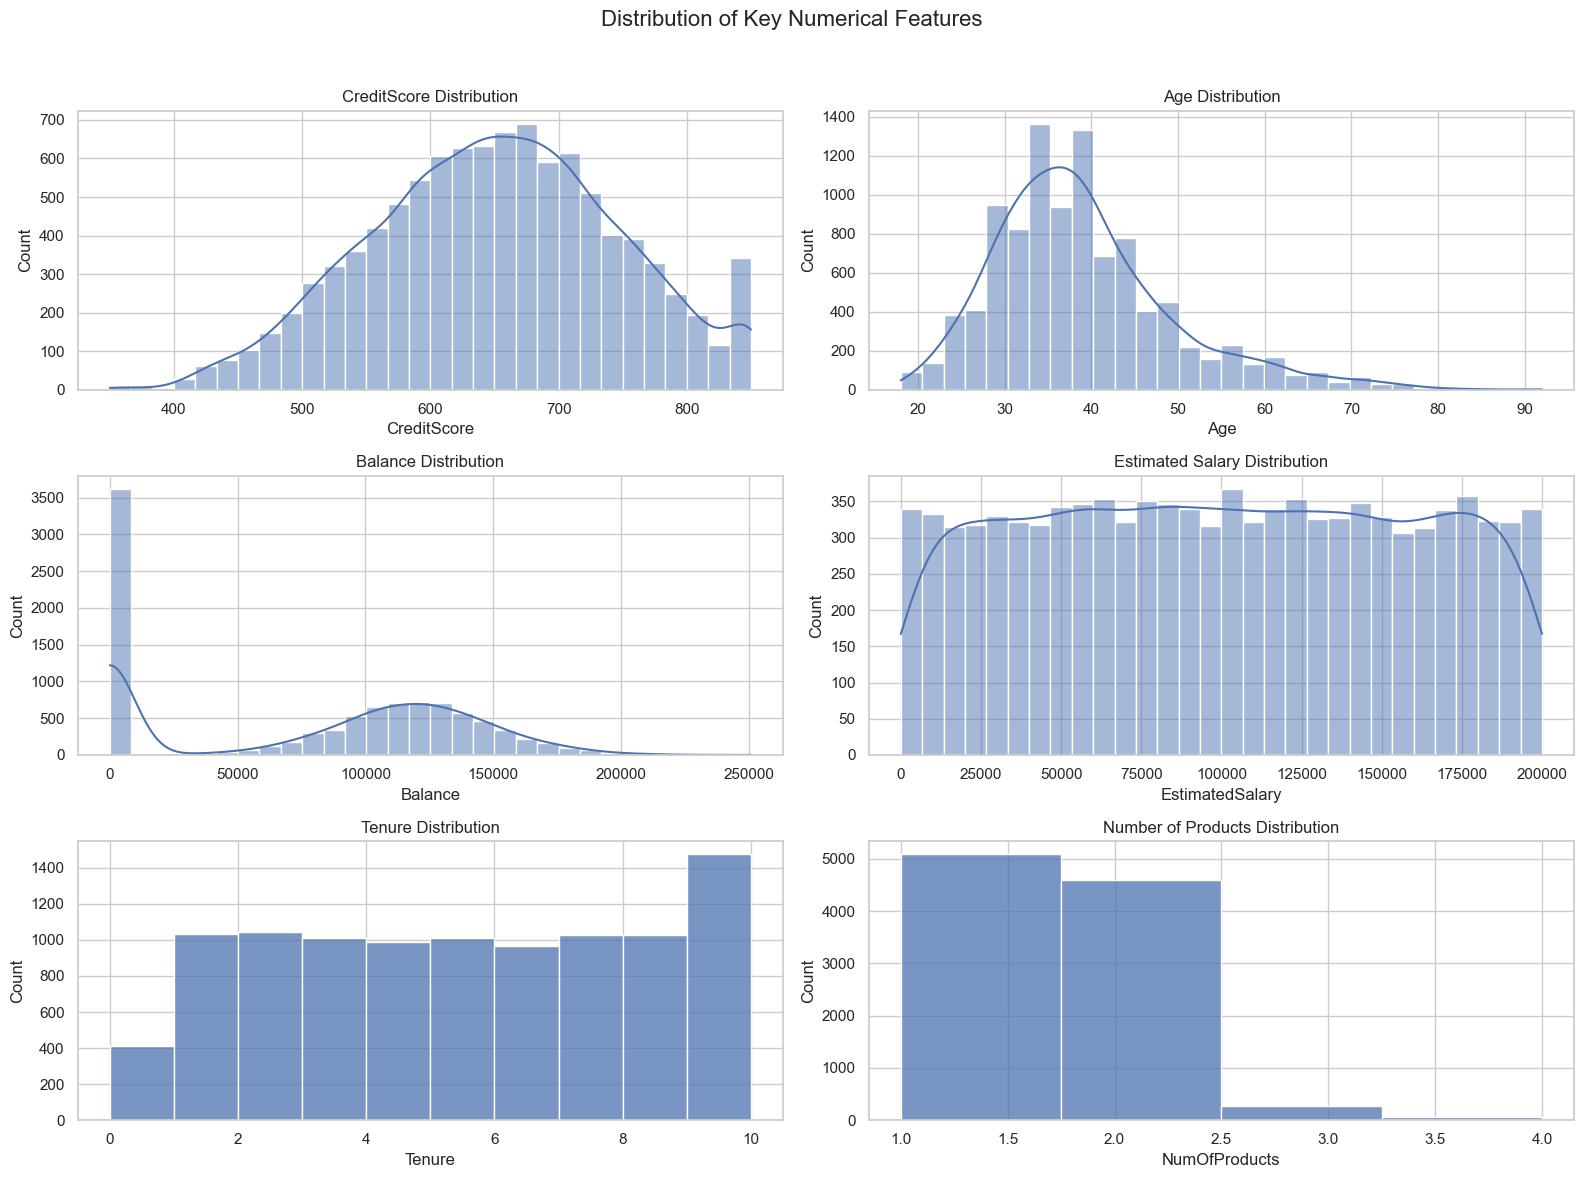

In [33]:
# Set up the visualizations
sns.set(style="whitegrid")

# Plot distributions
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Distribution of Key Numerical Features', fontsize=16)

sns.histplot(new_dataset['CreditScore'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('CreditScore Distribution')

sns.histplot(new_dataset['Age'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution')

sns.histplot(new_dataset['Balance'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Balance Distribution')

sns.histplot(new_dataset['EstimatedSalary'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Estimated Salary Distribution')

sns.histplot(new_dataset['Tenure'], bins=10, kde=False, ax=axes[2, 0])
axes[2, 0].set_title('Tenure Distribution')

sns.histplot(new_dataset['NumOfProducts'], bins=4, kde=False, ax=axes[2, 1])
axes[2, 1].set_title('Number of Products Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [34]:
# Filter the data to include only those who have a credit card and have exited
graph1 = new_dataset[(new_dataset['HasCrCard'] == 1) & (new_dataset['Exited'] == 1)]

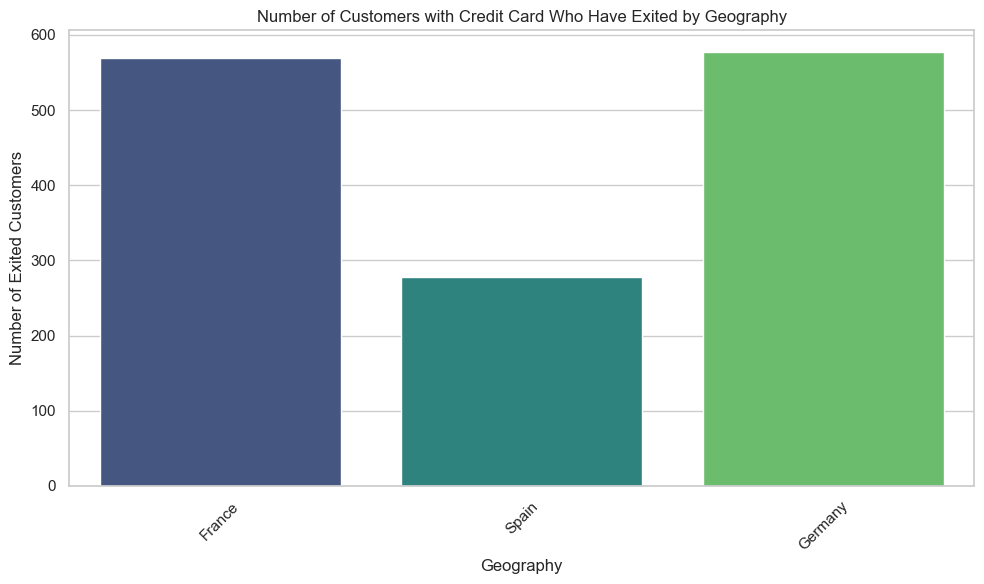

In [35]:
# Plot the data
plt.figure(figsize=(10, 6))
# You can use a bar plot or any other suitable plot based on your preference
sns.countplot(data=graph1, x='Geography', hue='Geography', palette='viridis', legend=False)
plt.title('Number of Customers with Credit Card Who Have Exited by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Exited Customers')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()
# Show the plot
plt.show()


COMMENT FROM THE GRAPH
Number of individuals who has cr card and Has Exited 
shows is also affected by region
where spain has Germany has many peolpe exited 
hence country can't be ignored in Modelling

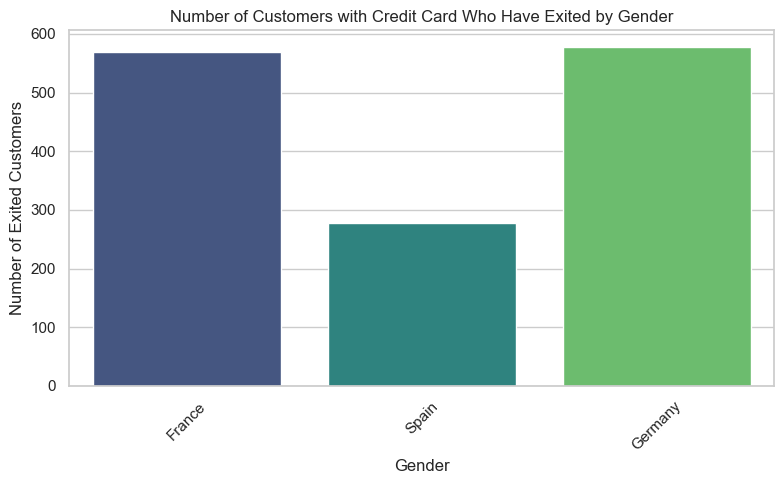

In [36]:
# Plot the data
plt.figure(figsize=(8, 5))
# countplot
sns.countplot(data=graph1, x='Geography', hue='Geography', palette='viridis', legend=False)
plt.title('Number of Customers with Credit Card Who Have Exited by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Exited Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
# Show the plot
plt.show()


COMMENT FROM THE GRAPH
Number of individuals who has cr card and Has Exited 
shows is also affected by Gender
where many Female has exited 
hence Gender can't be ignored in Modelling

# Using Balancing Dataset for Training

In [37]:
# separating the data for ana
no= new_dataset[new_dataset.Exited == 0]
yes = new_dataset[new_dataset.Exited == 1]

In [38]:
no.shape

(7959, 11)

In [39]:
yes.shape

(2037, 11)

In [41]:
no.shape

(7959, 11)

In [45]:
no_sample=no.sample(n=2037)

In [48]:
final_data=pd.concat([no_sample,yes],axis=0)

In [49]:
final_data.shape

(4074, 11)

In [50]:
final_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7659,680,France,Male,31.0,10,113292.17,1,1.0,1.0,122639.73,0
1699,696,Germany,Female,31.0,8,122021.92,2,1.0,0.0,33828.64,0
2712,565,Germany,Female,32.0,9,68067.24,1,1.0,0.0,143287.58,0
5016,501,France,Female,29.0,8,0.00,2,1.0,0.0,112664.24,0
3990,708,France,Male,32.0,10,86614.06,2,1.0,1.0,172129.26,0


In [51]:
final_data.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9981,498,Germany,Male,42.0,3,152039.70,1,1.0,1.0,53445.17,1
9982,655,Germany,Female,46.0,7,137145.12,1,1.0,0.0,115146.40,1
9991,597,France,Female,53.0,4,88381.21,1,1.0,0.0,69384.71,1
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


///////

dataset split

In [52]:
#make x and y for training
x=final_data.drop(columns='Exited')
y=final_data['Exited']

In [53]:
x.shape

(4074, 10)

In [54]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7659,680,France,Male,31.0,10,113292.17,1,1.0,1.0,122639.73
1699,696,Germany,Female,31.0,8,122021.92,2,1.0,0.0,33828.64
2712,565,Germany,Female,32.0,9,68067.24,1,1.0,0.0,143287.58
5016,501,France,Female,29.0,8,0.00,2,1.0,0.0,112664.24
3990,708,France,Male,32.0,10,86614.06,2,1.0,1.0,172129.26
...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42.0,3,152039.70,1,1.0,1.0,53445.17
9982,655,Germany,Female,46.0,7,137145.12,1,1.0,0.0,115146.40
9991,597,France,Female,53.0,4,88381.21,1,1.0,0.0,69384.71
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58


In [55]:
x.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object

In [56]:
y.shape

(4074,)

In [57]:
y

7659    0
1699    0
2712    0
5016    0
3990    0
       ..
9981    1
9982    1
9991    1
9997    1
9998    1
Name: Exited, Length: 4074, dtype: int64

# ENCODE CATEGORICAL COLUMNS

In [58]:
#Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Geography', 'Gender']),  # Encode categorical columns
        ('num', StandardScaler(), ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])  # Standardize numerical columns
    ])

In [59]:
#splitting the dataset
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
#Pass Model 
# Create a pipeline with preprocessing and logistic regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [61]:
#Fit the model 
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Geography', 'Gender']),
                                                 ('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('classifier', LogisticRegression())])

In [62]:
# accuracy on training data
X_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [63]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7042037434795949


In [64]:
# accuracy on testing data
X_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [65]:
print('Accuracy on Training data : ', test_data_accuracy)

Accuracy on Training data :  0.6699386503067485



/////////


[[[[

Save Model

In [66]:
import pickle

In [71]:
# Save the model
with open('EXITED CUSTOMER PRD-0.2BAl_Attemp1.pkl', 'wb') as file:
    pickle.dump(model, file)


# MAKE PREDICTION

In [68]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7659,680,France,Male,31.0,10,113292.17,1,1.0,1.0,122639.73
1699,696,Germany,Female,31.0,8,122021.92,2,1.0,0.0,33828.64
2712,565,Germany,Female,32.0,9,68067.24,1,1.0,0.0,143287.58
5016,501,France,Female,29.0,8,0.00,2,1.0,0.0,112664.24
3990,708,France,Male,32.0,10,86614.06,2,1.0,1.0,172129.26


In [69]:
y.head()

7659    0
1699    0
2712    0
5016    0
3990    0
Name: Exited, dtype: int64

1=Yes
0=No

In [72]:
# Load the model
with open('EXITED CUSTOMER PRD-0.2BAl_Attemp1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
# Example of predicting new data
new_data = pd.DataFrame({
    'Gender': ['Female'],
    'Geography': ['Spain'],
    'CreditScore': [608],
    'Age': [41],
    'Tenure': [1],
    'Balance': [83807.86],
    'NumOfProducts': [1],
    'HasCrCard': [0],
    'IsActiveMember': [1],
    'EstimatedSalary': [112542.58]
})

# Predict using the trained model
new_predictions = model.predict(new_data)
print("Predictions for new data:", new_predictions)

Predictions for new data: [1]
